# Homework 1

**Problem 1 (a-b)**


In [27]:
##################################################
# Author:   Sarthak Kumar Maharana
# Email:    maharana@usc.edu
# Date:     01/29/2022
# Course:   EE 559
# Project:  Homework 1
# Instructor: Prof. B Keith Jenkins
##################################################

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


from data.plotDecBoundaries import plotDecBoundaries


ROOTDIR = '~/Desktop/spring_22/EE_559/hw1/codes_2/data/'
train_file = 'synthetic1_train.csv'
test_file = 'synthetic1_test.csv'


class Homework1_ab:
    """
    Nearest Means Classifier
    """
    def __init__(self, 
                train_file,
                test_file,
                mode
                ):
        self.train_file = train_file
        self.test_file = test_file
        self.mode = mode


    def _read_csv_get_features(self, 
                              filename
                              ):
        """ Read csv files and return features, labels, and dataframe. """
        df = pd.read_csv(os.path.join(ROOTDIR, filename), 
                        header = None
                        )
        x, y = df.iloc[:, : -1].values, df.iloc[:, -1].values
        return x, y, df


    def _load(self):
        """ Utility function to load data. """
        self.train_x, self.train_y, _ = self._read_csv_get_features(self.train_file)
        self.test_x, self.test_y, _ = self._read_csv_get_features(self.test_file)
        return self.train_x, self.train_y, self.test_x, self.test_y


    def _plot_data(self):
        """ Plot for visualization. """
        plt.scatter(self.train_x[:, 0], 
                    self.train_x[:, 1], 
                    c = self.train_y, 
                    s = 50, 
                    cmap = 'viridis'
                    )
        plt.show()


    @staticmethod
    def L2distance(x, y):
        """ Compute L2 (Euclidean) distance between two vectors. """
        return np.sqrt(np.sum((x - y)**2))


    def _sample_mean(self, 
                    data_x, 
                    data_y
                    ):
        """ Compute the sample mean for the data. """
        c_1_mean = np.mean(data_x[data_y == 1], axis = 0) # mean of class 1
        c_2_mean = np.mean(data_x[data_y == 2], axis = 0) # mean of class 2 
        if len(np.unique(data_y)) >= 3:
            c_3_mean = np.mean(data_x[data_y == 3], axis = 0) # mean of class 3, if it exists
            self.sample_mean = np.vstack((c_1_mean, c_2_mean, c_3_mean))
            return self.sample_mean
        self.sample_mean = np.vstack((c_1_mean, c_2_mean))
        return self.sample_mean


    def _error_rate(self, 
                    data_x, 
                    data_y, 
                    mean
                    ):
        """ Compute error rate, based on the data and sample mean that are passed. """
        self.error = 0.0
        for idx in range(len(data_x)):
            e_feat_1 = self.L2distance(data_x[idx], 
                                      mean[0]
                                      ) # label 1 error
            e_feat_2 = self.L2distance(data_x[idx], 
                                      mean[1]
                                      ) # label 2 error
            if e_feat_1 > e_feat_2 and data_y[idx] == 1:
                self.error += 1
            if e_feat_1 < e_feat_2 and data_y[idx] == 2:
                self.error += 1
        return round(self.error / len(data_x), 3) # total error rate


    def _solver(self):
        """ Solver for the problem. """
        self.train_x, self.train_y, self.test_x, self.test_y = self._load()  # load data
        means = self._sample_mean(self.train_x, self.train_y) # train the "classifier" by computing the sample mean.
        return self._error_rate(self.test_x, self.test_y, means) if self.mode == 'test' \
        else self._error_rate(self.train_x, self.train_y, means) # return error rate on training data or test data based on user config. 



synthetic1 is being used....
Error rate on the train set:        0.21
Error rate on the test set:        0.24
Plots of data points, class means, decision boundaries and regions for train and test sets respectively:


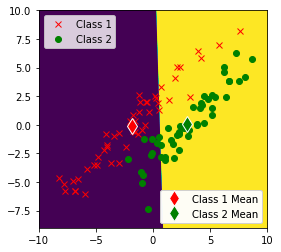

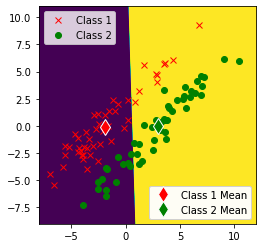

In [28]:
if __name__ == '__main__':
    """
    Available "mode" options: train, test.
    Configure train_file and test_file accordingly.
    """
    print(f"{train_file.split('_')[0]} is being used....")
    for mode_type in ['train', 'test']:
        hw1 = Homework1_ab(train_file, test_file, mode = mode_type)
        train_x, train_y, test_x, test_y = hw1._load()
        means = hw1._sample_mean(train_x, train_y)
        print(f'Error rate on the {hw1.mode} set:\
        {hw1._solver()}'
        )
    print("Plots of data points, class means, decision boundaries and regions for train and test sets respectively:")
    plotDecBoundaries(train_x, train_y, means) # plot decision boundaries and regions of the training data
    plotDecBoundaries(test_x, test_y, means) # plot decision boundaries and regions of the test data

**Problem 1 (c-e)** 

You've chosen option (d)
Finding best features w/ their errors.....
 For features 1 and 2, the error rate on the train set                     is 0.202
 For features 1 and 3, the error rate on the train set                     is 0.315
 For features 1 and 4, the error rate on the train set                     is 0.449
 For features 1 and 5, the error rate on the train set                     is 0.562
 For features 1 and 6, the error rate on the train set                     is 0.146
 For features 1 and 7, the error rate on the train set                     is 0.09
 For features 1 and 8, the error rate on the train set                     is 0.337
 For features 1 and 9, the error rate on the train set                     is 0.169
 For features 1 and 10, the error rate on the train set                     is 0.258
 For features 1 and 11, the error rate on the train set                     is 0.258
 For features 1 and 12, the error rate on the train set                     is 0.079
 For f

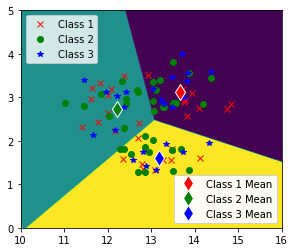

Plot of test data (best two features) is....


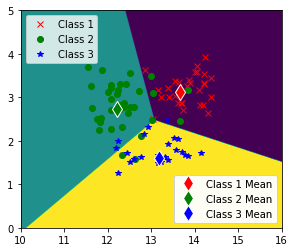

The least error on the train set is 0.079,             computed on the best features 1 and 12.
Obtaining error rates on the test set w/ the trained classifier....
 For features 1 and 2, the error rate on test set is             0.225
 For features 1 and 3, the error rate on test set is             0.281
 For features 1 and 4, the error rate on test set is             0.404
 For features 1 and 5, the error rate on test set is             0.449
 For features 1 and 6, the error rate on test set is             0.157
 For features 1 and 7, the error rate on test set is             0.112
 For features 1 and 8, the error rate on test set is             0.281
 For features 1 and 9, the error rate on test set is             0.247
 For features 1 and 10, the error rate on test set is             0.225
 For features 1 and 11, the error rate on test set is             0.27
 For features 1 and 12, the error rate on test set is             0.124
 For features 1 and 13, the error rate on test set is 

In [29]:
##################################################
# Author:   Sarthak Kumar Maharana
# Email:    maharana@usc.edu
# Date:     02/01/2022
# Course:   EE 559
# Project:  Homework 1
# Instructor: Prof. B Keith Jenkins
##################################################

import argparse
import itertools
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from data.plotDecBoundaries import plotDecBoundaries
from runner_synthetic import *


ROOTDIR = '~/Desktop/spring_22/EE_559/hw1/codes_2/data/'
train_file = 'wine_train.csv'
test_file = 'wine_test.csv'


class Homework1_ce(Homework1_ab):
    """
    Nearest Means Classifier
    """
    def __init__(self, 
                train_file,
                test_file,
                q_no,
                mode
                ):
        self.train_file = train_file
        self.test_file = test_file
        self.q_no = q_no
        self.mode = mode

    def _3class_error_rate(self, 
                            data_x,
                            data_y, 
                            means
                            ):
        """ Utility function to calculate the error rate of the classifier, based on the data and the means.  """      
        self.error = 0.0
        for idx in range(len(data_x)):
            e_feat_1 = self.L2distance(data_x[idx], 
                                      means[0]
                                      ) # label 1 error
            e_feat_2 = self.L2distance(data_x[idx], 
                                      means[1]
                                      ) # label 2 error
            e_feat_3 = self.L2distance(data_x[idx],
                                      means[2]
                                      ) # label 3 error   

            if e_feat_1 < e_feat_2 and \
                e_feat_1 < e_feat_3 and \
                data_y[idx] != 1:
                    self.error += 1   # misclassified as 1

            elif e_feat_2 < e_feat_1 and \
                e_feat_2 < e_feat_3 and \
                data_y[idx] != 2:
                    self.error += 1 # misclassified as 2

            elif e_feat_3 < e_feat_1 and \
                e_feat_3 < e_feat_2 and \
                data_y[idx] != 3:
                    self.error += 1 # misclassified as 3

        return round(self.error / len(data_x), 3) # total_error rate


    def _eda(self):
        """ Perform exploratory data analysis. """
        x, y, df = self._read_csv_get_features(self.train_file)
        df.describe()
        return self._plot_utils(df)
    
    def _plot_utils(self, df):
        """ Plot the distribution of the data, for analysis. """
        for idx in df.columns:
            gs1 = gridspec.GridSpec(3,1)
            ax1 = plt.subplot(gs1[:-1])
            gs1.update(right = 0.60)
            sns.kdeplot(df.iloc[:,idx][df.iloc[:,-1] == 1], ax = ax1, label = '1')
            sns.kdeplot(df.iloc[:,idx][df.iloc[:,-1] == 2], ax = ax1, label = '2')
            sns.kdeplot(df.iloc[:,idx][df.iloc[:,-1] == 3], ax = ax1, label = '3')
            ax1.xaxis.set_visible(False)
            ax1.title.set_text(f"x_{idx}")
            plt.legend()
            plt.show()
        return None


    def _best_features(self, means):
        """ Return a combination of features that minimizes the error rate. """
        print("Finding best features w/ their errors.....")
        feats_combos = list(itertools.combinations(range(13), 2))  # generate all possible combos of features
        best_feats = {}
        for idx in feats_combos:
            x1, x2 = idx[0], idx[1] # current features
            self.error_best = 0.0
            for count, jdx in enumerate(self.train_x[:,[x1,x2]]):   
                e_feat_1 = self.L2distance(jdx, 
                                    means[0][[x1, x2]]
                                      ) # label 1 error
                e_feat_2 = self.L2distance(jdx, 
                                     means[1][[x1, x2]]
                                      ) # label 2 error
                e_feat_3 = self.L2distance(jdx,
                                    means[2][[x1, x2]]
                                      ) # label 3 erro
                if e_feat_1 < e_feat_2 and \
                e_feat_1 < e_feat_3 and \
                self.train_y[count] != 1:
                    self.error_best += 1

                elif e_feat_2 < e_feat_1 and \
                e_feat_2 < e_feat_3 and \
                self.train_y[count] != 2:
                    self.error_best += 1

                elif e_feat_3 < e_feat_1 and \
                e_feat_3 < e_feat_2 and \
                self.train_y[count] != 3:
                    self.error_best += 1

            best_feats[idx] = self.error_best / len(self.train_x) # store error rate for each combo of features
            print(f" For features {x1 + 1} and {x2 + 1}, the error rate on the train set \
                    is {round(best_feats[idx], 3)}"
                    )
        return best_feats


    def _test_error_diff_feats(self, means):
        """ Test the error rate of the classifier with different features. """
        print("Obtaining error rates on the test set w/ the trained classifier....")
        feats_combos = list(itertools.combinations(range(13), 2)) # pairs of combinations of features
        for idx in feats_combos:
            x1, x2 = idx[0], idx[1]
            self.error_test = 0.0
            for count, jdx in enumerate(self.test_x[:,[x1,x2]]):   
                e_feat_1 = self.L2distance(jdx, 
                                    means[0][[x1, x2]]
                                      ) # label 1 error
                e_feat_2 = self.L2distance(jdx, 
                                     means[1][[x1, x2]]
                                      ) # label 2 error
                e_feat_3 = self.L2distance(jdx,
                                    means[2][[x1, x2]]
                                      ) # label 3 erro
                if e_feat_1 < e_feat_2 and \
                e_feat_1 < e_feat_3 and \
                self.test_y[count] != 1:
                    self.error_test += 1

                elif e_feat_2 < e_feat_1 and \
                e_feat_2 < e_feat_3 and \
                self.test_y[count] != 2:
                    self.error_test += 1

                elif e_feat_3 < e_feat_1 and \
                e_feat_3 < e_feat_2 and \
                self.test_y[count] != 3:
                    self.error_test += 1

            print(f" For features {x1 + 1} and {x2 + 1}, the error rate on test set is \
            {round(self.error_test / len(self.test_x), 3)}"
            )


    def _main(self):
        """ Main function that attends each test case. """
        self.train_x, self.train_y, self.test_x, self.test_y = self._load() # load train and test data

        # to solve 1(c) for the wine dataset. 
        if self.q_no == 'c':
            print("You've chosen option (c)")
            x_train, x_test = self.train_x[:, :2], self.test_x[:, :2] # choose only the first two features
            means = self._sample_mean(x_train, self.train_y) # compute sample means for each class
            print("Plot of training data is....")
            plotDecBoundaries(x_train, self.train_y, means) # plot decision boundaries on train set
            print("Plot of test data is....")
            plotDecBoundaries(x_train, self.train_y, means) # plot decision boundaries on test set
            error = self._3class_error_rate(x_test, self.test_y, means) if self.mode == 'test' \
            else self._3class_error_rate(x_train, self.train_y, means) # compute error rate
            print(f"The error on the {self.mode} set is {error}.")

        # to solve 1(d) and 1(e) for the wine dataset.
        elif self.q_no == 'd':
            print("You've chosen option (d)")
            means = self._sample_mean(self.train_x, self.train_y) # compute sample means for each class
            feats_errors = self._best_features(means) # return the features and their errors
            min_error_feats = min(feats_errors.items(), key = lambda x: x[1]) # choose the feature with the minimum error
            x1_best, x2_best = min_error_feats[0][0], \
                               min_error_feats[0][1] # features with min error
            x_train, x_test = self.train_x[:, [x1_best, x2_best]], \
                                        self.test_x[:, [x1_best, x2_best]] # choose only the data of the best features
            best_mean = self._sample_mean(x_train, self.train_y) # compute mean of the best features
            print("Plot of training data (best two features) is....")
            plotDecBoundaries(x_train, self.test_y, best_mean) # plot decision boundaries on the best features
            print("Plot of test data (best two features) is....")
            plotDecBoundaries(x_test, self.test_y, best_mean) # plot decision boundaries on the best features
            error = self._3class_error_rate(x_test, self.test_y, best_mean) if self.mode == 'test' \
            else self._3class_error_rate(x_train, self.train_y, best_mean) # compute error rate on train/test based on the best features. 
            print(f"The least error on the {self.mode} set is {error}, \
            computed on the best features {x1_best + 1} and {x2_best + 1}.")
            print(self._test_error_diff_feats(means)) 
            # print error rates on the test set w the trained classifier (for diff pair of features)

        else:
            raise ValueError('Invalid question number.\
                Please choose either (c) or (d)'
                )


if __name__ == '__main__':
    """
    Configure the object hw2 of Homework1_ce accordingly. 
    
    Available "q_no" options: c, d [c (Performs 1(c)) and d performs 1(d) and 1(e)]
    Available "mode" options: train, test [default: train]
    
    If q_no = c and mode = 'train', use features x1 and x2 and report the error on the training data. 
    If q_no = c and mode = 'test', use features x1 and x2 and report the error on the test data. 
    
    If q_no = d and mode = 'train', compute the best features and report the error on the training data.
    If q_no = d and mode = 'test', compute the best features and report the error on the test data.
    
    """   
    hw2 = Homework1_ce(train_file, test_file, q_no = 'd', mode = 'train')
    hw2._main()